In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from helpers import *

set_seed(99, True)

In [3]:
print(path)

df.head()

/notebooks/paddy_data


,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [4]:
bs = 64
lm_dls = get_lm_dls(bs)

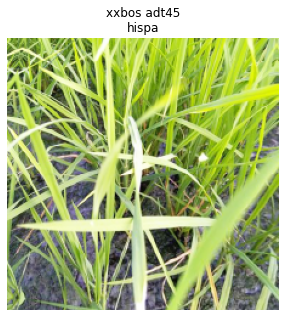

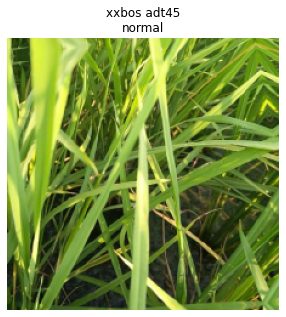

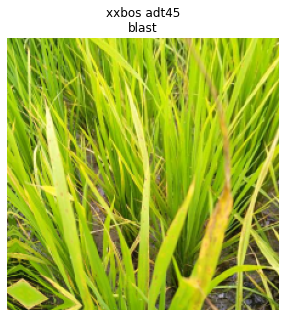

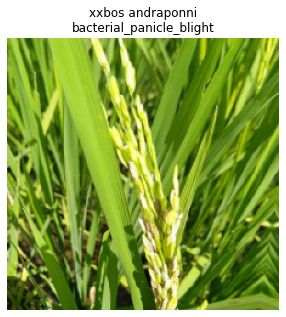

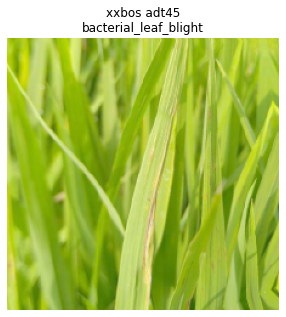

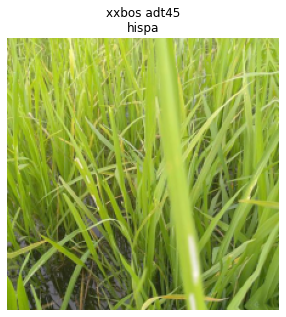

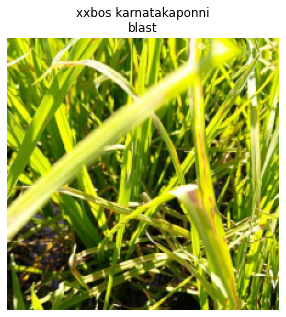

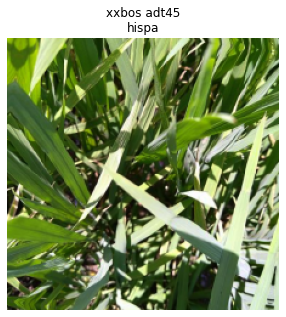

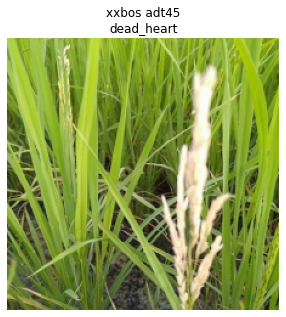

In [5]:
def get_image_and_text_items(df):
    df['image_path'] = path/'train_images'/df.label/df.image_id
    return list(zip(df.image_path, df.variety.str.lower(), df.label))

dls = DataBlock(
    blocks=(ImageBlock, TextBlock.from_df(['variety'], vocab=lm_dls.vocab, seq_len=1), CategoryBlock),
    n_inp=2,
    get_items=get_image_and_text_items,
    get_x=(ItemGetter(0), ItemGetter(1)),
    get_y=ItemGetter(2),
    item_tfms=Resize(480),
    batch_tfms=aug_transforms(min_scale=0.7, size=224),
    splitter=RandomSubsetSplitter(train_sz=0.8, valid_sz=0.2),
).dataloaders(df, bs=bs, shuffle=True)

dls.show_batch()

# Test helpers working

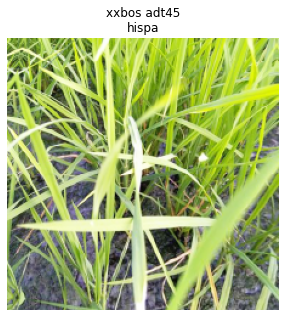

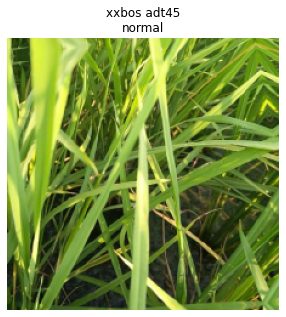

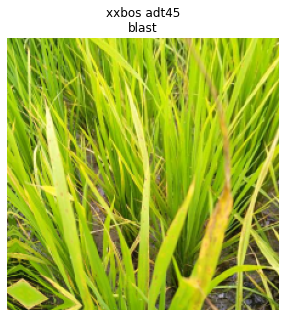

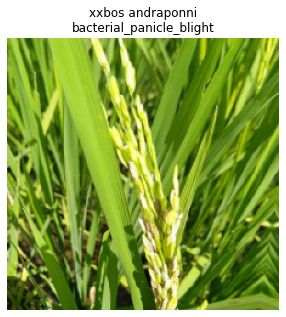

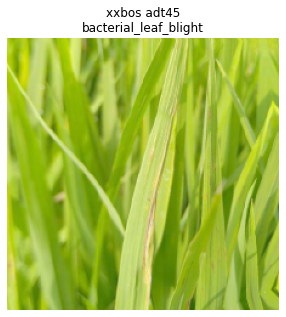

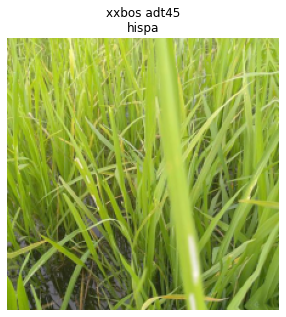

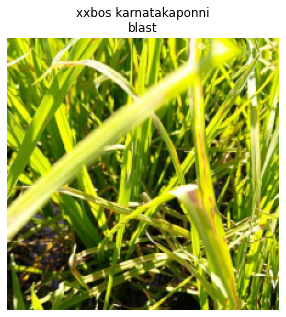

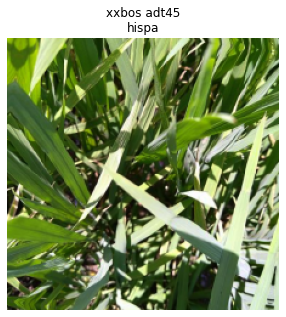

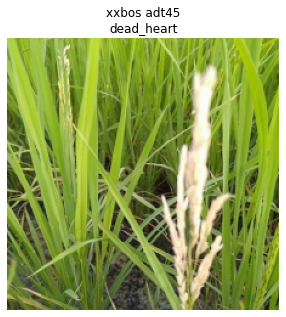

In [5]:
from helpers import get_image_and_text_dls
get_image_and_text_dls(bs).show_batch()